In [1]:
import re
import pandas as pd

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')


def dataImport(filename):
    info = []
    for xs in filename:
        data = open(xs)
        for r in data:
            r = r.replace('\n', '')
            r = re.sub('https\W*t.co/\w*','',r)
            info.append(r.encode('ascii', 'ignore').decode('ascii'))
    return info

data = dataImport(["../data/tweets0.txt","../data/tweets1.txt","../data/tweets2.txt","../data/tweets3.txt","../data/tweets4.txt","../data/tweets5.txt"])
print(len(data))

7335


In [2]:
menciones = dataImport(['../data/diccionarios/cod.txt'])
print(menciones)

['CODVID19', 'coronavirus', 'covid19', 'Covid', 'COVID~19', 'COVID-19', 'Covid-19', 'Coronavirus', 'neumona atpica', 'SARS-CoV2', 'virusito', 'COVID 19', 'COVID 19', 'Covid', 'pseudocuarentena ', 'cuarentena', 'pandemia', 'crisis', 'conferencia', 'COVID-19', 'virus', 'SARS-CoV 2']


In [3]:
def etiqueta(data, etiqueta):
    list_et = []
    val = -1
    for xs in data:    
        val = -1
        for ys in etiqueta:
            if len(re.findall(ys, xs)) > 0:
                val = 1
                break
            else:
                val = 0
        list_et.append(val)
        
    return list_et
                

eti = etiqueta(data,menciones)


In [4]:
frame_txt = pd.DataFrame(data, columns=['texto'])
etiqueta = pd.DataFrame(eti,columns=['etiqueta'])
data_etiquetada = pd.concat([frame_txt,etiqueta], axis=1)
positivos = data_etiquetada[data_etiquetada['etiqueta'] == 1]

In [16]:
sintomas =  dataImport(['../data/diccionarios/sintomas.txt'])

print(sintomas)


def numApariciones(texto, terminos):
    numRepeticiones = []
    it = 0 
    for xs in terminos:
        it = 0
        for ys in texto:
            it += len(re.findall(xs, ys))
        numRepeticiones.append(it)
        
        
    terminos_df = pd.DataFrame(terminos, columns=['terminos'])
    aparaciones_df = pd.DataFrame(numRepeticiones, columns=['#Repeticiones'])
    return pd.concat([terminos_df, aparaciones_df], axis = 1)


#print(numApariciones(positivos['texto'], sintomas))

data_sintomas = numApariciones(data_etiquetada['texto'], sintomas) 
            

['Dolor de cabeza agudo', 'cuerpo cortado', 'fiebre leve', 'tos ', 'fiebre', 'TOS SECA ', 'dolor de garganta ', 'de altas temperaturas', 'cansancio', 'diarrea', 'moco']


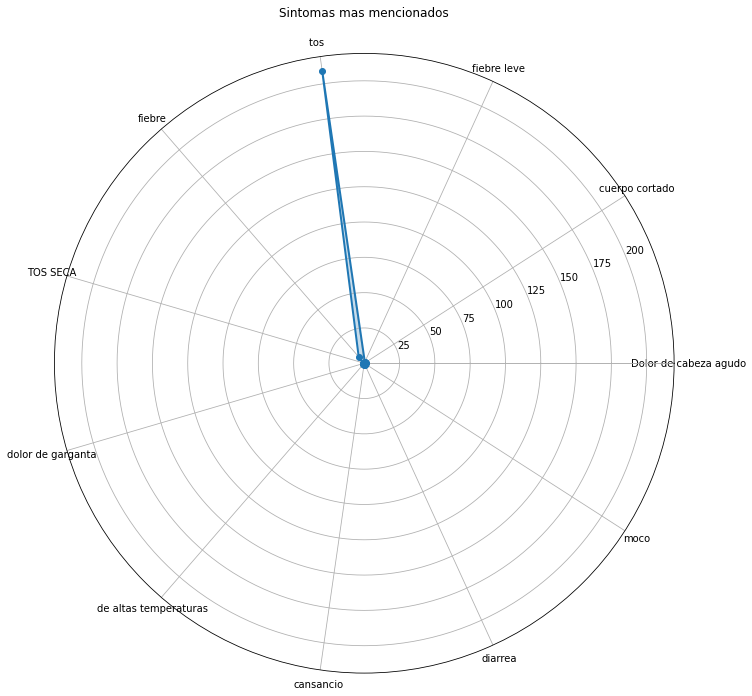

In [23]:
%matplotlib inline
import numpy as np
import seaborn as sns




def grafica_radar(data, termino):
    labels=np.array(data['terminos'])
    stats= data['#Repeticiones'].values



    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    fig= plt.figure(figsize=(22.2, 11.4))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title(termino + ' mas mencionados')
    ax.grid(True)
    plt.show()
    
    
grafica_radar(data_sintomas, 'Sintomas')



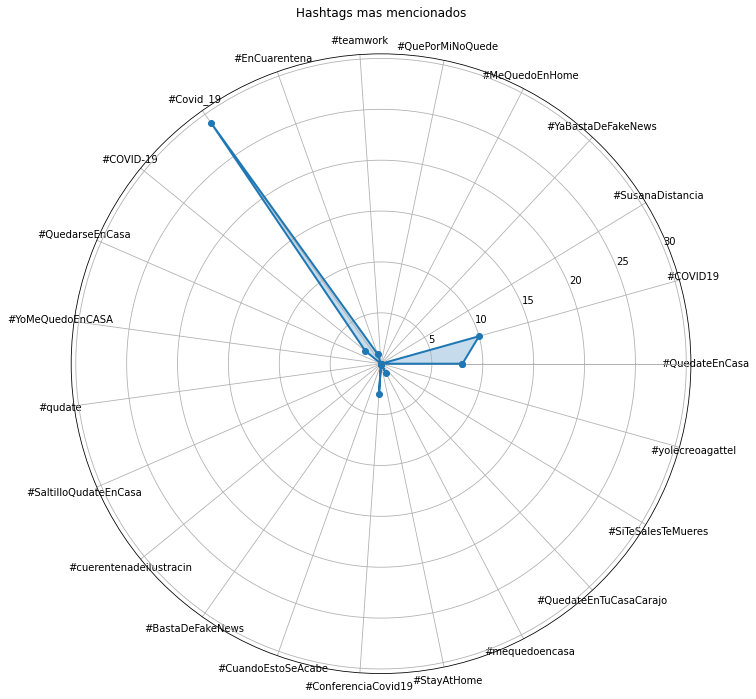

In [28]:
hast = dataImport(['../data/diccionarios/hashtag.txt'])

data_hashtag = numApariciones(data_etiquetada['texto'], hast) 

grafica_radar(data_hashtag, 'Hashtags')


         terminos  #Repeticiones
0      @SSalud_mx             49
1  @lopezobrador_            142
2       @HLGatell            210
3     @GobiernoMX             10
4        @Tu_IMSS              2
5      @ISSSTE_mx              1


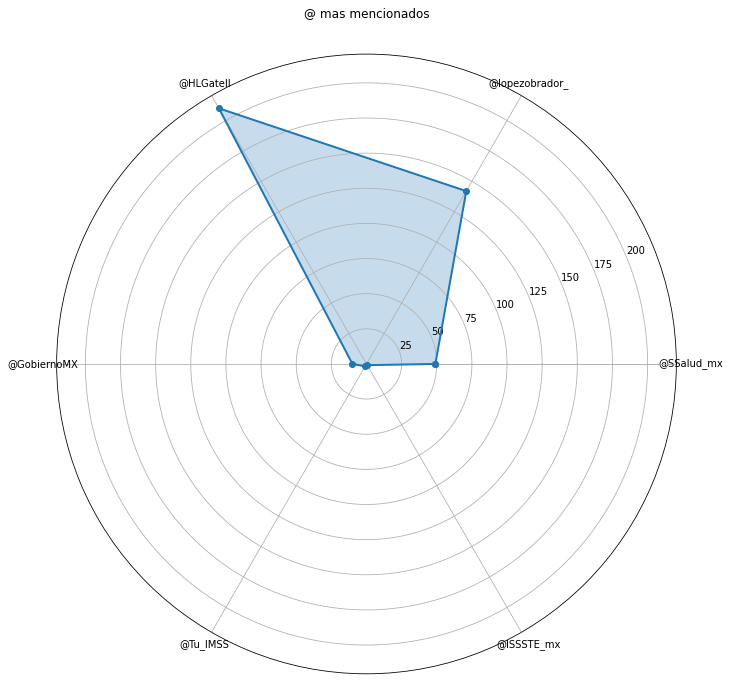

In [33]:
menciones = dataImport(['../data/diccionarios/men.txt'])

data_menciones = numApariciones(data_etiquetada['texto'], menciones) 
print(data_menciones)

grafica_radar(data_menciones, '@')